# ML_Analysis

### Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file=('Concat_ML_Data/first_debate.csv')
first_df=pd.read_csv(file)
first_df.head()

tweet  replies_count  \
0   Truly wish YOU had been the Moderator Brian Y...              0   
1  Crazy different RT Joe Biden hit Trump with th...              0   
2   Brilliant retort Joe The world hopes for your...              0   
3                Anytime or slandering Joe Biden Me               0   
4     You are just trying to rile us and it working               0   

   retweets_count  likes_count candidate  tweet_length  Subjectivity  \
0               0            0     Biden            40           0.1   
1               0            0     Biden            13           0.7   
2               0            0     Biden            20           0.5   
3               2            2     Biden             6           0.0   
4               0            1     Biden            10           0.0   

   Polarity Sentiment  
0     -0.20  Negative  
1     -0.20  Negative  
2      0.45  Positive  
3      0.00   Neutral  
4      0.00   Neutral

### Basic Metrics

In [3]:
# Separating entire dataset to sentiments for Trump and Biden
biden_sentiment=first_df[(first_df['candidate']=='Biden')]
trump_sentiment=first_df[(first_df['candidate']=='Trump')]

In [4]:
# Computing sentiment percentages for each candidate
biden_sentiments_by_type=biden_sentiment.groupby(['Sentiment']).count()['tweet']
total_biden_tweets=biden_sentiment.count()['tweet']
biden_sentiment_percents=100*biden_sentiments_by_type/total_biden_tweets

trump_sentiments_by_type=trump_sentiment.groupby(['Sentiment']).count()['tweet']
total_trump_tweets=trump_sentiment.count()['tweet']
trump_sentiment_percents=100*trump_sentiments_by_type/total_trump_tweets

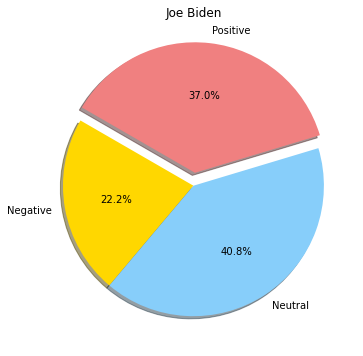

In [5]:
import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.pie(biden_sentiment_percents,
    labels=["Negative", "Neutral", "Positive"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("Joe Biden")

mpl.rcParams['font.size'] = 14

# Show Figure
plt.show()

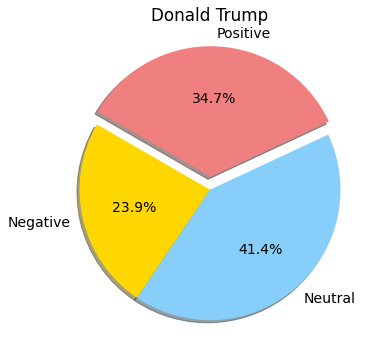

In [6]:
plt.subplots(figsize=(10, 6))
plt.pie(trump_sentiment_percents,
    labels=["Negative", "Neutral", "Positive"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("Donald Trump")

mpl.rcParams['font.size'] = 14

# Show Figure
plt.show()

### Word Cloud

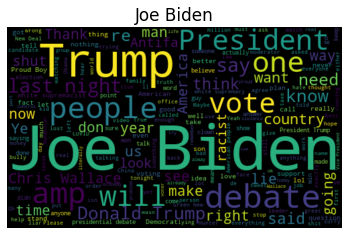

In [7]:
# Plotting a word cloud
# Import Dependencies
from wordcloud import WordCloud

allWordsBiden= ' '.join([twts for twts in biden_sentiment['tweet']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allWordsBiden)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Joe Biden')
plt.show()

In [8]:
allWordsTrump= ' '.join([twts for twts in trump_sentiment['tweet']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allWordsTrump)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Donald Trump')
plt.show()

In [9]:
# Import Dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

### Preprocessing Data 

In [20]:
B = pd.get_dummies(biden_sentiment, columns=["Sentiment"]) # Dummify 'Sentiment' feature
T = pd.get_dummies(trump_sentiment, columns=["Sentiment"])

In [ ]:
X.drop(['tweet', 'candidate_Biden'], axis=1, inplace=True) # Dropping the 'tweet' column

In [16]:
X=X.rename(columns={"candidate_Trump": "candidate"}) # where 0=Biden and 1=Trump

In [19]:
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)  
    
    # Fitting model
    model.fit(df)
    predictions = model.predict(df)
    
    # Add a new class column to df_iris
    df["class"] = model.labels_

In [21]:
test_cluster_amount(X, 3)
X.hvplot.scatter(x="Polarity", y="tweet_length", by="class")

:NdOverlay   [class]
   :Scatter   [Polarity]   (tweet_length)

In [ ]:
# Plotting clusters with two features
# X.hvplot.scatter(x="Subjectivity", y="Polarity", by="candidate_Trump")
cluster_1=pd.DataFrame(X, columns=['Polarity','candidate_Trump','likes_count'])

In [ ]:
# Standardizing Data from X dataframe
X_scaled = StandardScaler().fit_transform(cluster_1)
print(X_scaled[0:4])

In [ ]:
# Finding the best value for K
inertia = []
k = list(range(1, 11))

# Calculating the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Creating Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

In [ ]:
import plotly.express as px
fig=px.scatter_3d(
    four_clusters,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="class",
    symbol="class",
    width=800,
)

fig.update_layout(legend=dict(x=0, y=1))
fig.show()